<a href="https://colab.research.google.com/github/kdChen07/LSCP_kd/blob/main/map%26gini_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install inequality
!pip install libpysal
!pip install geopandas
!pip install mapclassify

In [6]:
import mapclassify
from google.colab import files 
import pandas
import numpy

In [7]:
import sys
import os
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
sys.path.append(os.path.abspath('..'))
import inequality
import libpysal

In [9]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines

##第一部分

#读取MSOA数据

In [1]:
import geopandas

gdf = geopandas.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/England_basemap/MSOA_Boundary_with_population.gpkg?raw=true')
gdf = gdf.to_crs('epsg:4326')
from libpysal.weights import Queen, Rook, KNN

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
tract = geopandas.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/England_basemap/MSOA_Boundary_with_population.gpkg?raw=true')
tract = tract.to_crs('epsg:4326')

In [4]:
gdf['dissolve']=1
MSOA_outline = gdf.dissolve(by='dissolve')

#读入能为MSOA提供疫苗服务的原有疫苗站数量

In [10]:
a=pandas.read_csv('https://github.com/kdChen07/LSCP_kd/blob/main/data2/before_optimisation.csv?raw=true')
a

origin_id  number
0     E02000001     623
1     E02000002      69
2     E02000003      68
3     E02000004      42
4     E02000005      73
...         ...     ...
6403  E02006930     453
6404  E02006931     516
6405  E02006932      14
6406  E02006933      13
6407  E02006934      10

[6408 rows x 2 columns]

#将地图数据和能提供疫苗站数量拼接

In [ ]:
gdf1 = pandas.merge(left = gdf,right = a, how='left', left_on='MSOA11CD', right_on='origin_id')

In [12]:
gdf1['number'].fillna(0, inplace=True)
gdf1

MSOA11CD                  MSOA11NM  pop0-49  ...  dissolve  origin_id  number
0     E02000001        City of London 001     6206  ...         1  E02000001   623.0
1     E02000002  Barking and Dagenham 001     5621  ...         1  E02000002    69.0
2     E02000003  Barking and Dagenham 002     8062  ...         1  E02000003    68.0
3     E02000004  Barking and Dagenham 003     4401  ...         1  E02000004    42.0
4     E02000005  Barking and Dagenham 004     7982  ...         1  E02000005    73.0
...         ...                       ...      ...  ...       ...        ...     ...
6786  E02006930             Greenwich 037     7425  ...         1  E02006930   453.0
6787  E02006931             Greenwich 038     7267  ...         1  E02006931   516.0
6788  E02006932             Liverpool 060    16963  ...         1  E02006932    14.0
6789  E02006933             Liverpool 061     7130  ...         1  E02006933    13.0
6790  E02006934             Liverpool 062     7653  ...         1  E02006934    10.0

[6791 rows x 13 columns]

#基尼系数

In [13]:
gini_1 = inequality.gini.Gini(gdf1['number'])

In [15]:
gini_1.g

0.8371008749630625

In [16]:
tract1=pandas.merge(left = gdf,right = a, how='right', left_on='MSOA11CD', right_on='origin_id')

In [17]:
tract11 =tract1.loc[tract1['number']==0]
tract12 =tract1.loc[tract1['number']==1]
tract13 =tract1.loc[tract1['number']==2]
tract14 =tract1.loc[(tract1['number']>=3)&(tract1['number']<7)]
tract15 =tract1.loc[(tract1['number']>=7)&(tract1['number']<19)]
tract16 =tract1.loc[(tract1['number']>=19)&(tract1['number']<660)]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


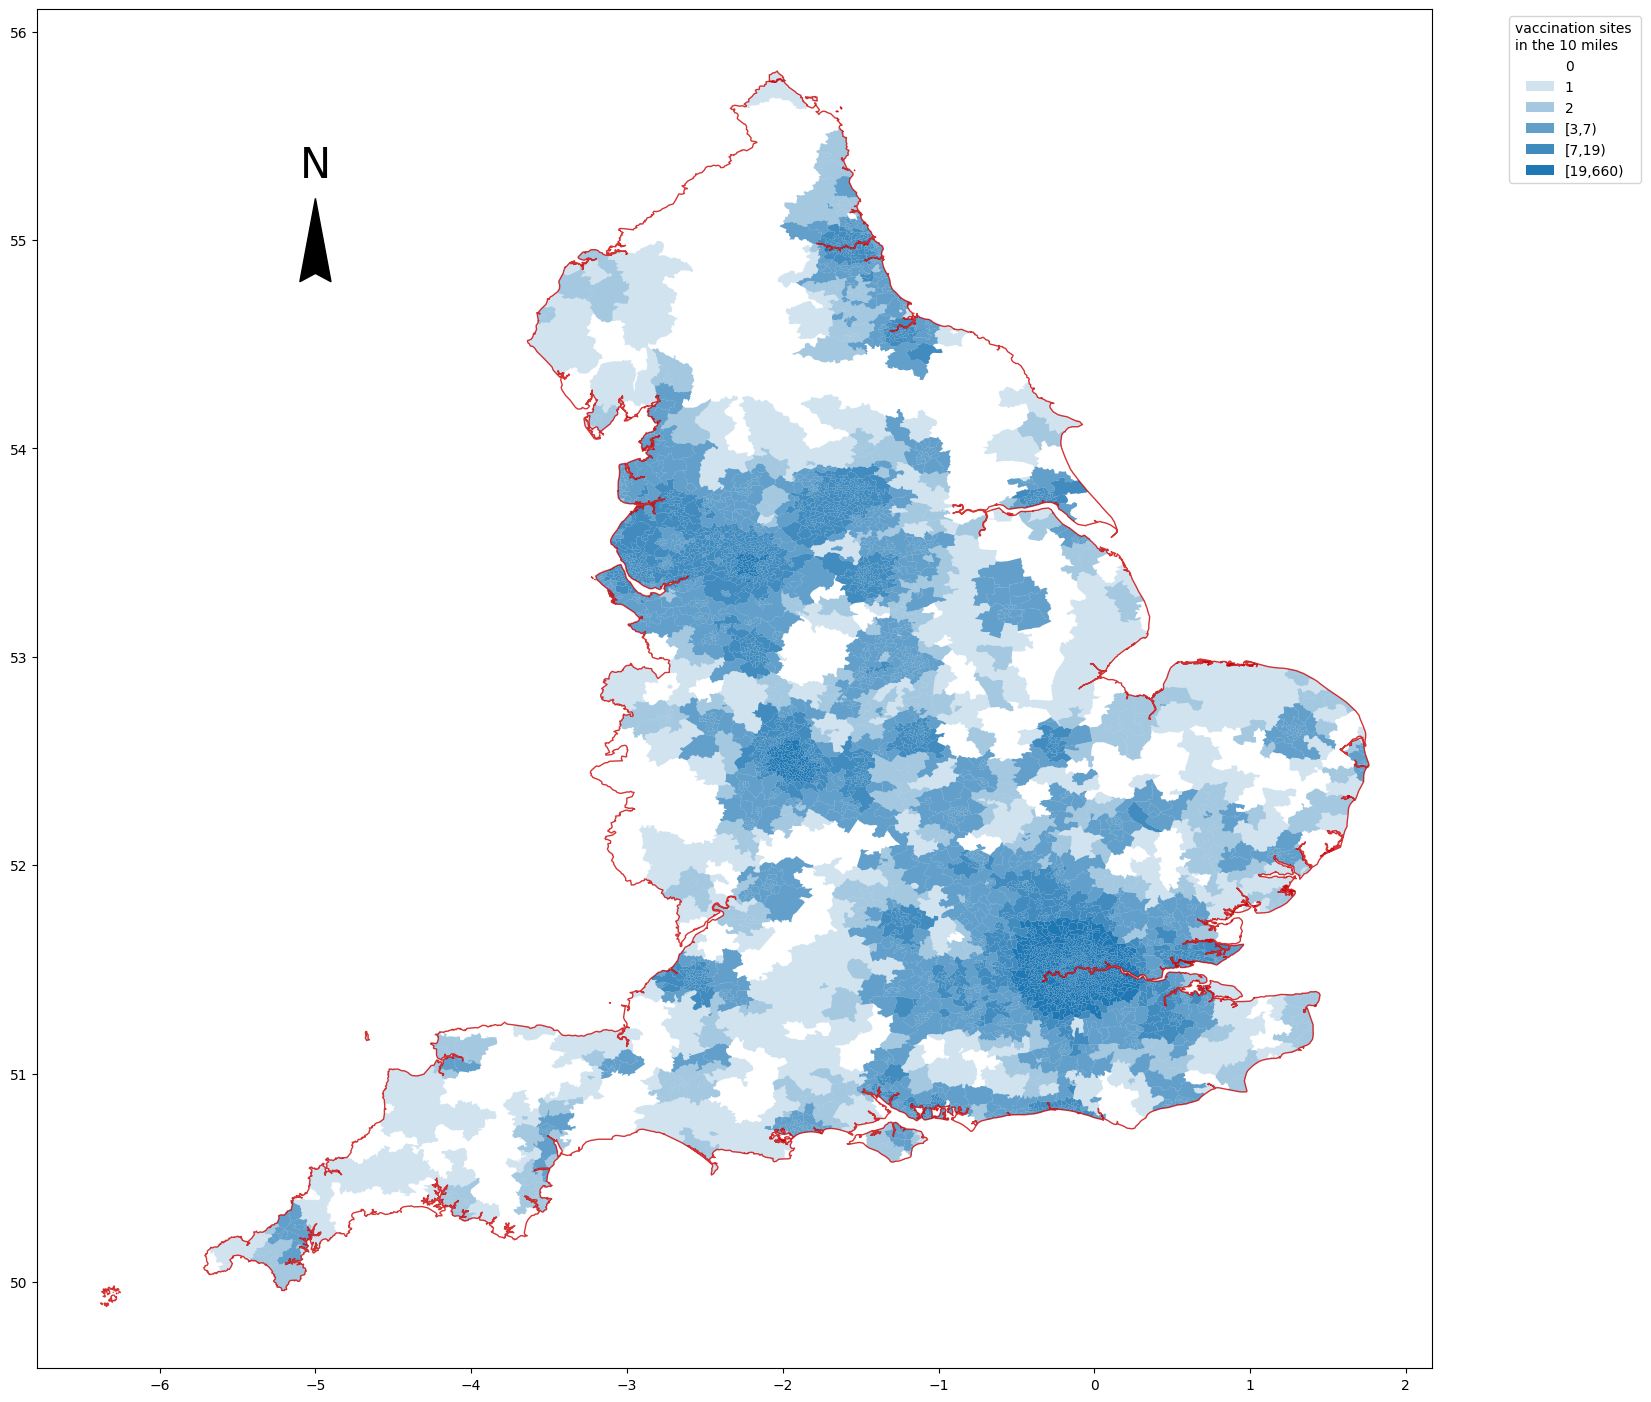

In [19]:
    fig, ax = plt.subplots(figsize=(18,18),dpi=100)
    legend_elements = []
    tract11.plot(figsize = (18,18),ax=ax,zorder=1,color='none')
    tract12.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract13.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract14.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.7)
    tract15.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.85)
    tract16.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)

    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)

    ax.text(x=-5.1, y=55.3, s='N', fontsize=30)
    ax.arrow(-5, 55, 0, 0.2, length_includes_head=True,
       head_width=.2, head_length=.4, overhang=.1, facecolor='k')

    legend_elements.append(Patch(zorder=2,alpha=0,label='0'))
    legend_elements.append(Patch(zorder=2,alpha=0.2,label='1'))
    legend_elements.append(Patch(zorder=2,alpha=0.4,label='2'))
    legend_elements.append(Patch(zorder=2,alpha=0.7,label='[3,7)'))
    legend_elements.append(Patch(zorder=2,alpha=0.85,label='[7,19)'))
    legend_elements.append(Patch(zorder=2,label='[19,660)'))  
    
    plt.gca().set_aspect('auto')
    plt.legend(handles = legend_elements, loc='upper left',title='vaccination sites \nin the 10 miles',bbox_to_anchor=(1.05, 1))

##第二部分

In [22]:
facility_points = pandas.read_csv('https://github.com/kdChen07/LSCP_kd/blob/main/data2/lscp_1_point.csv?raw=true')
facility_points

name_id                           name  point_lon  point_lat  index
0        682              Axbridge Pharmacy  -2.817315  51.286887     74
1        692            Torrington Hospital  -4.136968  50.954726     76
2        804                          Boots  -0.733159  53.752808     95
3        929             Rowbotham Pharmacy  -0.012834  53.683643    108
4        930                 Holme Pharmacy  -0.765928  53.836858    109
..       ...                            ...        ...        ...    ...
123    17685             Community Midwives  -2.494133  54.578967   2311
124    17811           Karuna Teachings Ltd  -3.808379  50.605729   2330
125    18502                  Helen Howells  -1.768067  52.089126   2409
126    19332          Abbey Hearing Clinics  -2.274283  51.037320   2491
127    21198  Dartmouth Chiropractic Clinic  -3.596877  50.351242   2673

[128 rows x 5 columns]

In [23]:
facility_points_gdf = geopandas.GeoDataFrame(
    facility_points,
    geometry=geopandas.points_from_xy(
        facility_points.point_lon, facility_points.point_lat
    ),
).sort_values(by=['index']).reset_index()

In [24]:
facility_points_gdf

level_0  name_id  ... index                   geometry
0          0      682  ...    74  POINT (-2.81732 51.28689)
1          1      692  ...    76  POINT (-4.13697 50.95473)
2          2      804  ...    95  POINT (-0.73316 53.75281)
3          3      929  ...   108  POINT (-0.01283 53.68364)
4          4      930  ...   109  POINT (-0.76593 53.83686)
..       ...      ...  ...   ...                        ...
123      123    17685  ...  2311  POINT (-2.49413 54.57897)
124      124    17811  ...  2330  POINT (-3.80838 50.60573)
125      125    18502  ...  2409  POINT (-1.76807 52.08913)
126      126    19332  ...  2491  POINT (-2.27428 51.03732)
127      127    21198  ...  2673  POINT (-3.59688 50.35124)

[128 rows x 7 columns]

In [25]:
facility_points2 = pandas.read_csv('https://github.com/kdChen07/LSCP_kd/blob/main/data2/lscp_2_point.csv?raw=true')
facility_points2

index  ...  point_lat
0        0  ...  52.128622
1        7  ...  52.173067
2       13  ...  51.771050
3       17  ...  52.756615
4       18  ...  52.476707
..     ...  ...        ...
296   1544  ...  52.340191
297   1548  ...  52.977164
298   1572  ...  53.789699
299   1592  ...  51.070083
300   1595  ...  50.515949

[301 rows x 4 columns]

In [26]:
facility_points_gdf2 = geopandas.GeoDataFrame(
    facility_points2,
    geometry=geopandas.points_from_xy(
        facility_points2.point_lon, facility_points2.point_lat
    ),
).sort_values(by=['index']).reset_index()

In [27]:
facility_points_gdf2

level_0  index                   geometry  point_lon  point_lat
0          0      0  POINT (-0.47121 52.12862)  -0.471211  52.128622
1          1      7   POINT (0.13688 52.17307)   0.136883  52.173067
2          2     13   POINT (0.08581 51.77105)   0.085809  51.771050
3          3     17   POINT (0.44697 52.75662)   0.446967  52.756615
4          4     18   POINT (1.75630 52.47671)   1.756302  52.476707
..       ...    ...                        ...        ...        ...
296      296   1544  POINT (-1.52663 52.34019)  -1.526633  52.340191
297      297   1548  POINT (-0.06976 52.97716)  -0.069759  52.977164
298      298   1572  POINT (-2.24446 53.78970)  -2.244462  53.789699
299      299   1592  POINT (-1.80030 51.07008)  -1.800300  51.070083
300      300   1595  POINT (-4.86582 50.51595)  -4.865818  50.515949

[301 rows x 5 columns]

#读入LSCP2优化后的能为MSOA提供疫苗服务的疫苗站数量

In [28]:
b=pandas.read_csv('https://github.com/kdChen07/LSCP_kd/blob/main/data2/after_optimisation_lscp_2_number.csv?raw=true')
b

origin_id  number
0     E02000001       2
1     E02000002       1
2     E02000003       1
3     E02000004       1
4     E02000005       1
...         ...     ...
6403  E02006930       1
6404  E02006931       1
6405  E02006932       2
6406  E02006933       2
6407  E02006934       1

[6408 rows x 2 columns]

In [29]:
gdf2 = pandas.merge(left = gdf,right = b, how='right', left_on='MSOA11CD', right_on='origin_id')

In [30]:
tract2=pandas.merge(left = gdf,right = b, how='right', left_on='MSOA11CD', right_on='origin_id')

In [31]:
tract21 =tract2.loc[tract2['number']==0]
tract22 =tract2.loc[tract2['number']==1]
tract23 =tract2.loc[tract2['number']==2]
tract24 =tract2.loc[(tract2['number']>=3)&(tract2['number']<7)]
tract25 =tract2.loc[(tract2['number']>=7)&(tract2['number']<19)]
tract26 =tract2.loc[(tract2['number']>=19)&(tract2['number']<660)]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


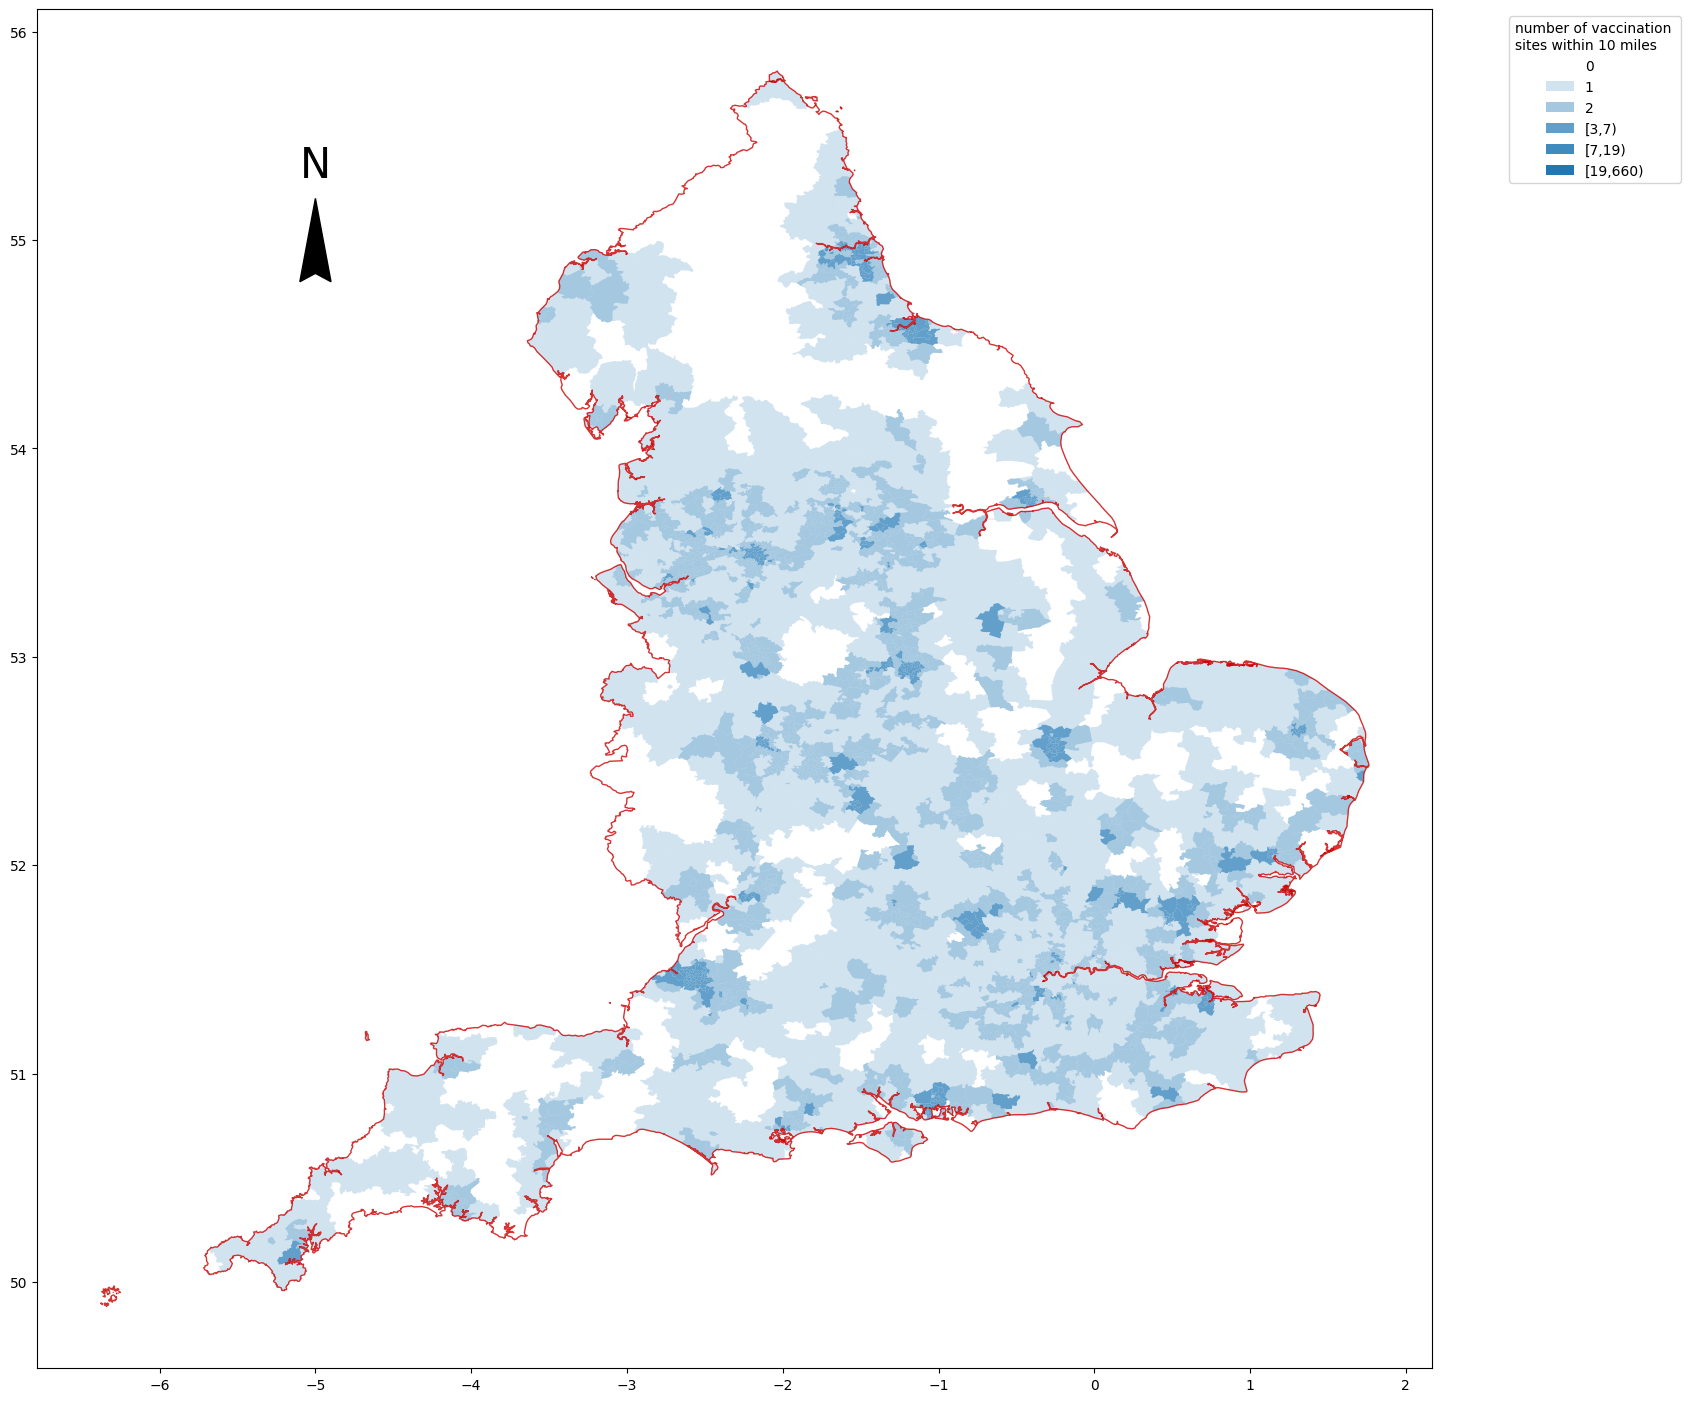

In [34]:
    fig, ax = plt.subplots(figsize=(18,18),dpi=100)
    legend_elements = []
    tract21.plot(figsize = (18,18),ax=ax,zorder=1,color='none')
    tract22.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract23.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract24.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.7)
    tract25.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.85)
    tract26.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)

    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)

    ax.text(x=-5.1, y=55.3, s='N', fontsize=30)
    ax.arrow(-5, 55, 0, 0.2, length_includes_head=True,
       head_width=.2, head_length=.4, overhang=.1, facecolor='k')

    legend_elements.append(Patch(zorder=2,alpha=0,label='0'))
    legend_elements.append(Patch(zorder=2,alpha=0.2,label='1'))
    legend_elements.append(Patch(zorder=2,alpha=0.4,label='2'))
    legend_elements.append(Patch(zorder=2,alpha=0.7,label='[3,7)'))
    legend_elements.append(Patch(zorder=2,alpha=0.85,label='[7,19)'))
    legend_elements.append(Patch(zorder=2,label='[19,660)'))  
    plt.gca().set_aspect('auto')
    plt.legend(handles = legend_elements, loc='upper left',title='number of vaccination \nsites within 10 miles',bbox_to_anchor=(1.05, 1))

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


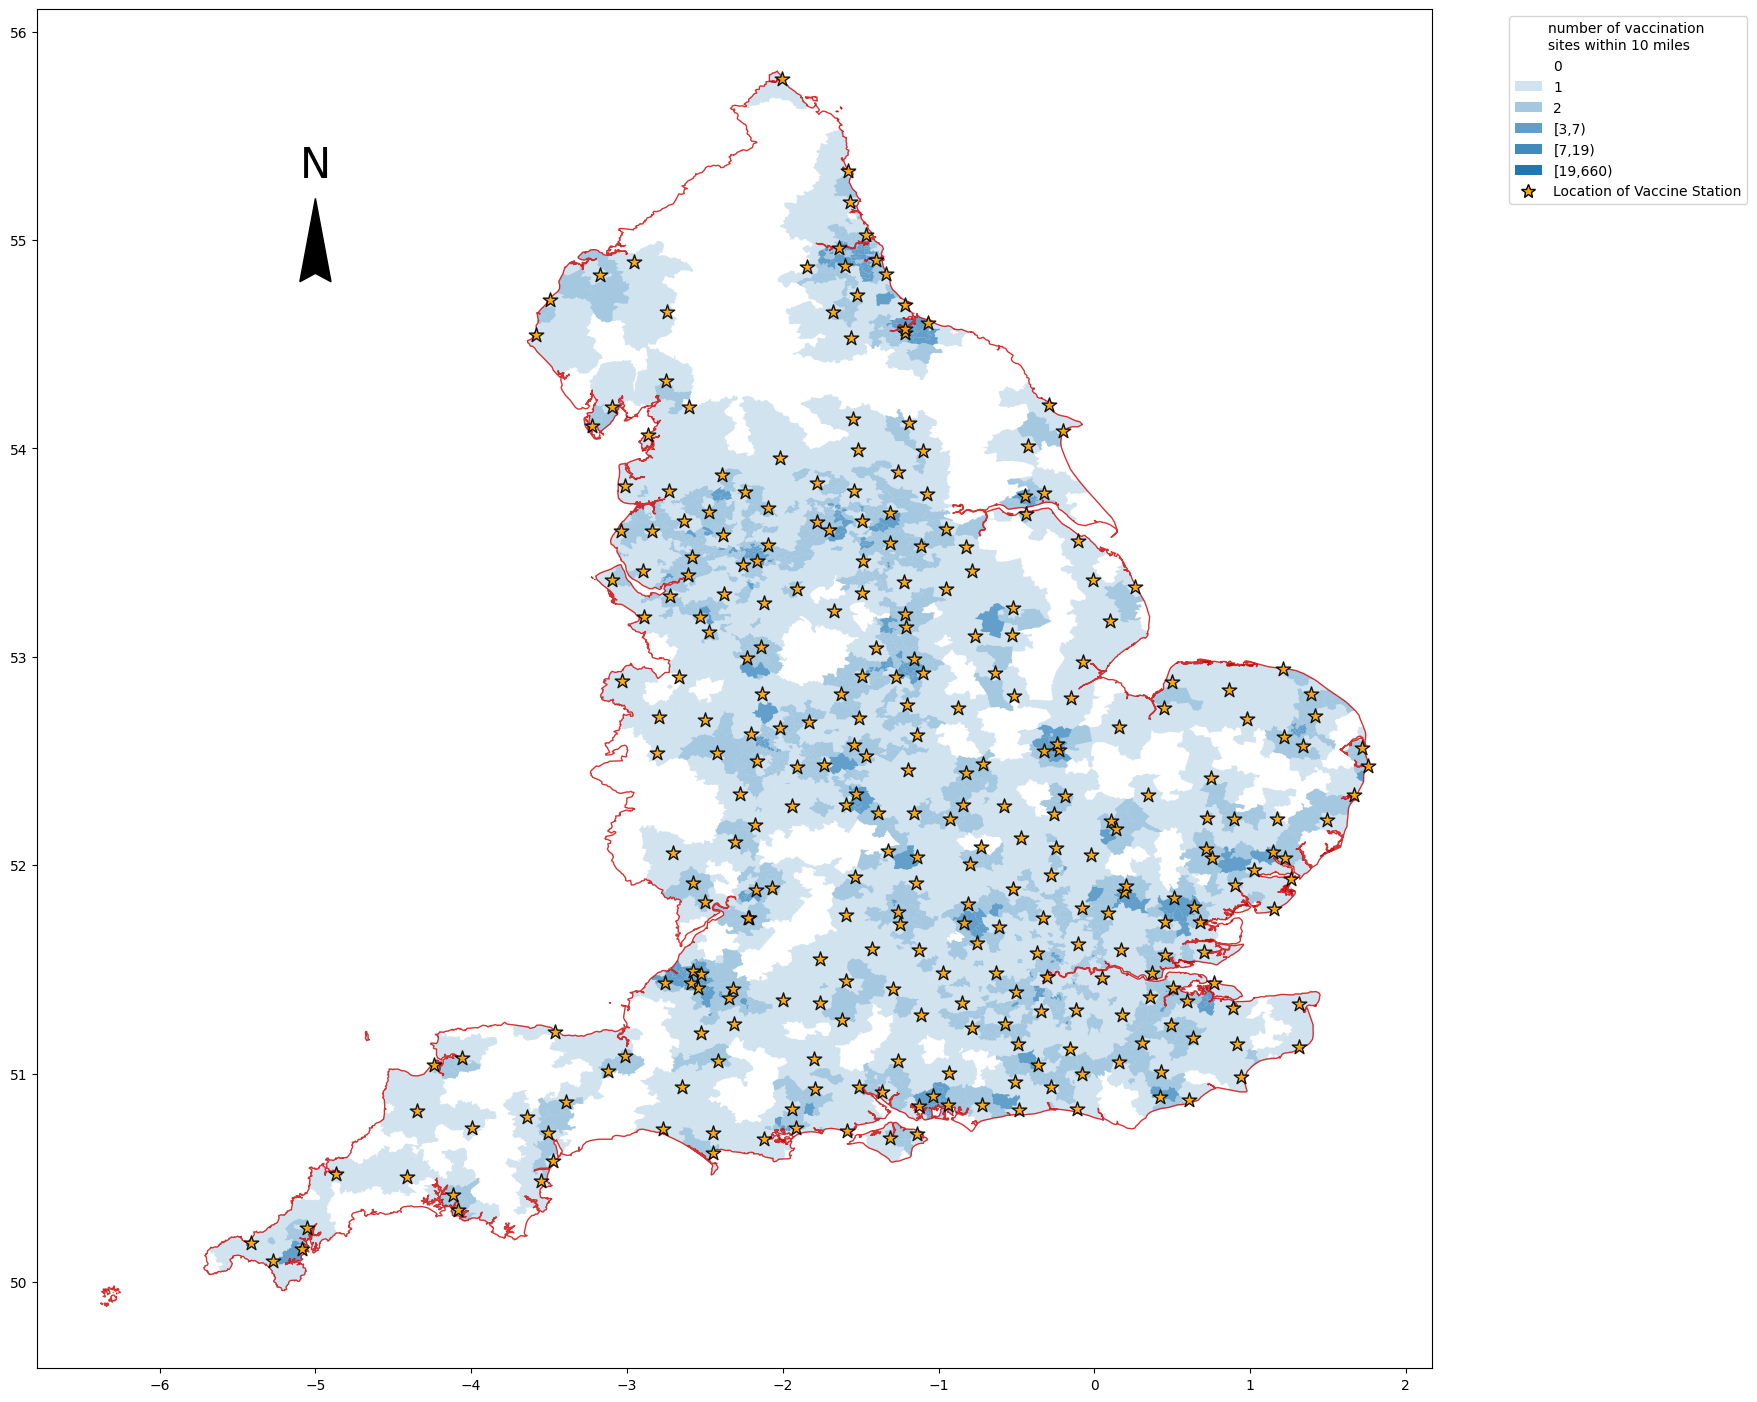

In [35]:
    fig, ax = plt.subplots(figsize=(18,18),dpi=100)
    legend_elements = []
    tract21.plot(figsize = (18,18),ax=ax,zorder=1,color='none')
    tract22.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract23.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract24.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.7)
    tract25.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.85)
    tract26.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    ax.text(x=-5.1, y=55.3, s='N', fontsize=30)
    ax.arrow(-5, 55, 0, 0.2, length_includes_head=True,
       head_width=.2, head_length=.4, overhang=.1, facecolor='k')
    facility_points_gdf2.plot(ax=ax,
                marker="*",
                markersize=120,
                alpha=0.9,
                zorder=4,
                edgecolor="k",
                facecolor='orange')
    legend_elements.append(Patch(zorder=2,alpha=0,label='0'))
    legend_elements.append(Patch(zorder=2,alpha=0.2,label='1'))
    legend_elements.append(Patch(zorder=2,alpha=0.4,label='2'))
    legend_elements.append(Patch(zorder=2,alpha=0.7,label='[3,7)'))
    legend_elements.append(Patch(zorder=2,alpha=0.85,label='[7,19)'))
    legend_elements.append(Patch(zorder=2,label='[19,660)'))  
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='orange',
        marker='*',
        markersize=10,
        markeredgecolor="k",
        linewidth=0,
        label='Location of Vaccine Station'
        ))
    plt.gca().set_aspect('auto')
    plt.legend(handles = legend_elements, loc='upper left',title='number of vaccination \nsites within 10 miles',bbox_to_anchor=(1.05, 1))

##第四种情况

#读入能为6788个（有3个MSOA无法得到服务）MSOA提供疫苗服务的经过LSCP1、LSCP2优化后的疫苗站数量number

In [36]:
c=pandas.read_csv('https://github.com/kdChen07/LSCP_kd/blob/main/data2/after_optimisation.csv?raw=true')
c

index  origin_id  number
0       0.0  E02000001       2
1       1.0  E02000002       1
2       2.0  E02000003       1
3       3.0  E02000004       1
4       4.0  E02000005       1
...     ...        ...     ...
6783    NaN  E02006845       2
6784    NaN  E02006846       2
6785    NaN  E02006857       1
6786    NaN  E02006870       1
6787    NaN  E02006880       1

[6788 rows x 3 columns]

In [38]:
gdf5 = pandas.merge(left = gdf,right = c, how='left', left_on='MSOA11CD', right_on='origin_id')

In [39]:
gdf5

MSOA11CD                  MSOA11NM  pop0-49  ...   index  origin_id  number
0     E02000001        City of London 001     6206  ...     0.0  E02000001     2.0
1     E02000002  Barking and Dagenham 001     5621  ...     1.0  E02000002     1.0
2     E02000003  Barking and Dagenham 002     8062  ...     2.0  E02000003     1.0
3     E02000004  Barking and Dagenham 003     4401  ...     3.0  E02000004     1.0
4     E02000005  Barking and Dagenham 004     7982  ...     4.0  E02000005     1.0
...         ...                       ...      ...  ...     ...        ...     ...
6786  E02006930             Greenwich 037     7425  ...  6403.0  E02006930     1.0
6787  E02006931             Greenwich 038     7267  ...  6404.0  E02006931     1.0
6788  E02006932             Liverpool 060    16963  ...  6405.0  E02006932     2.0
6789  E02006933             Liverpool 061     7130  ...  6406.0  E02006933     2.0
6790  E02006934             Liverpool 062     7653  ...  6407.0  E02006934     1.0

[6791 rows x 14 columns]

In [40]:
gdf5['number'].fillna(0, inplace=True)

#基尼系数

In [41]:
gini_1600Z2 = inequality.gini.Gini(gdf5['number'])
gini_1600Z2.g

0.2314133268129151

In [42]:
tract3=pandas.merge(left = gdf,right = c, how='left', left_on='MSOA11CD', right_on='origin_id')

In [43]:
tract3['number'].fillna(0, inplace=True)
tract3

MSOA11CD                  MSOA11NM  pop0-49  ...   index  origin_id  number
0     E02000001        City of London 001     6206  ...     0.0  E02000001     2.0
1     E02000002  Barking and Dagenham 001     5621  ...     1.0  E02000002     1.0
2     E02000003  Barking and Dagenham 002     8062  ...     2.0  E02000003     1.0
3     E02000004  Barking and Dagenham 003     4401  ...     3.0  E02000004     1.0
4     E02000005  Barking and Dagenham 004     7982  ...     4.0  E02000005     1.0
...         ...                       ...      ...  ...     ...        ...     ...
6786  E02006930             Greenwich 037     7425  ...  6403.0  E02006930     1.0
6787  E02006931             Greenwich 038     7267  ...  6404.0  E02006931     1.0
6788  E02006932             Liverpool 060    16963  ...  6405.0  E02006932     2.0
6789  E02006933             Liverpool 061     7130  ...  6406.0  E02006933     2.0
6790  E02006934             Liverpool 062     7653  ...  6407.0  E02006934     1.0

[6791 rows x 14 columns]

In [44]:
tract31 =tract3.loc[tract3['number']==0]
tract32 =tract3.loc[tract3['number']==1]
tract33 =tract3.loc[tract3['number']==2]
tract34 =tract3.loc[(tract3['number']>=3)&(tract3['number']<7)]
tract35 =tract3.loc[(tract3['number']>=7)&(tract3['number']<19)]
tract36 =tract3.loc[(tract3['number']>=19)&(tract3['number']<660)]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


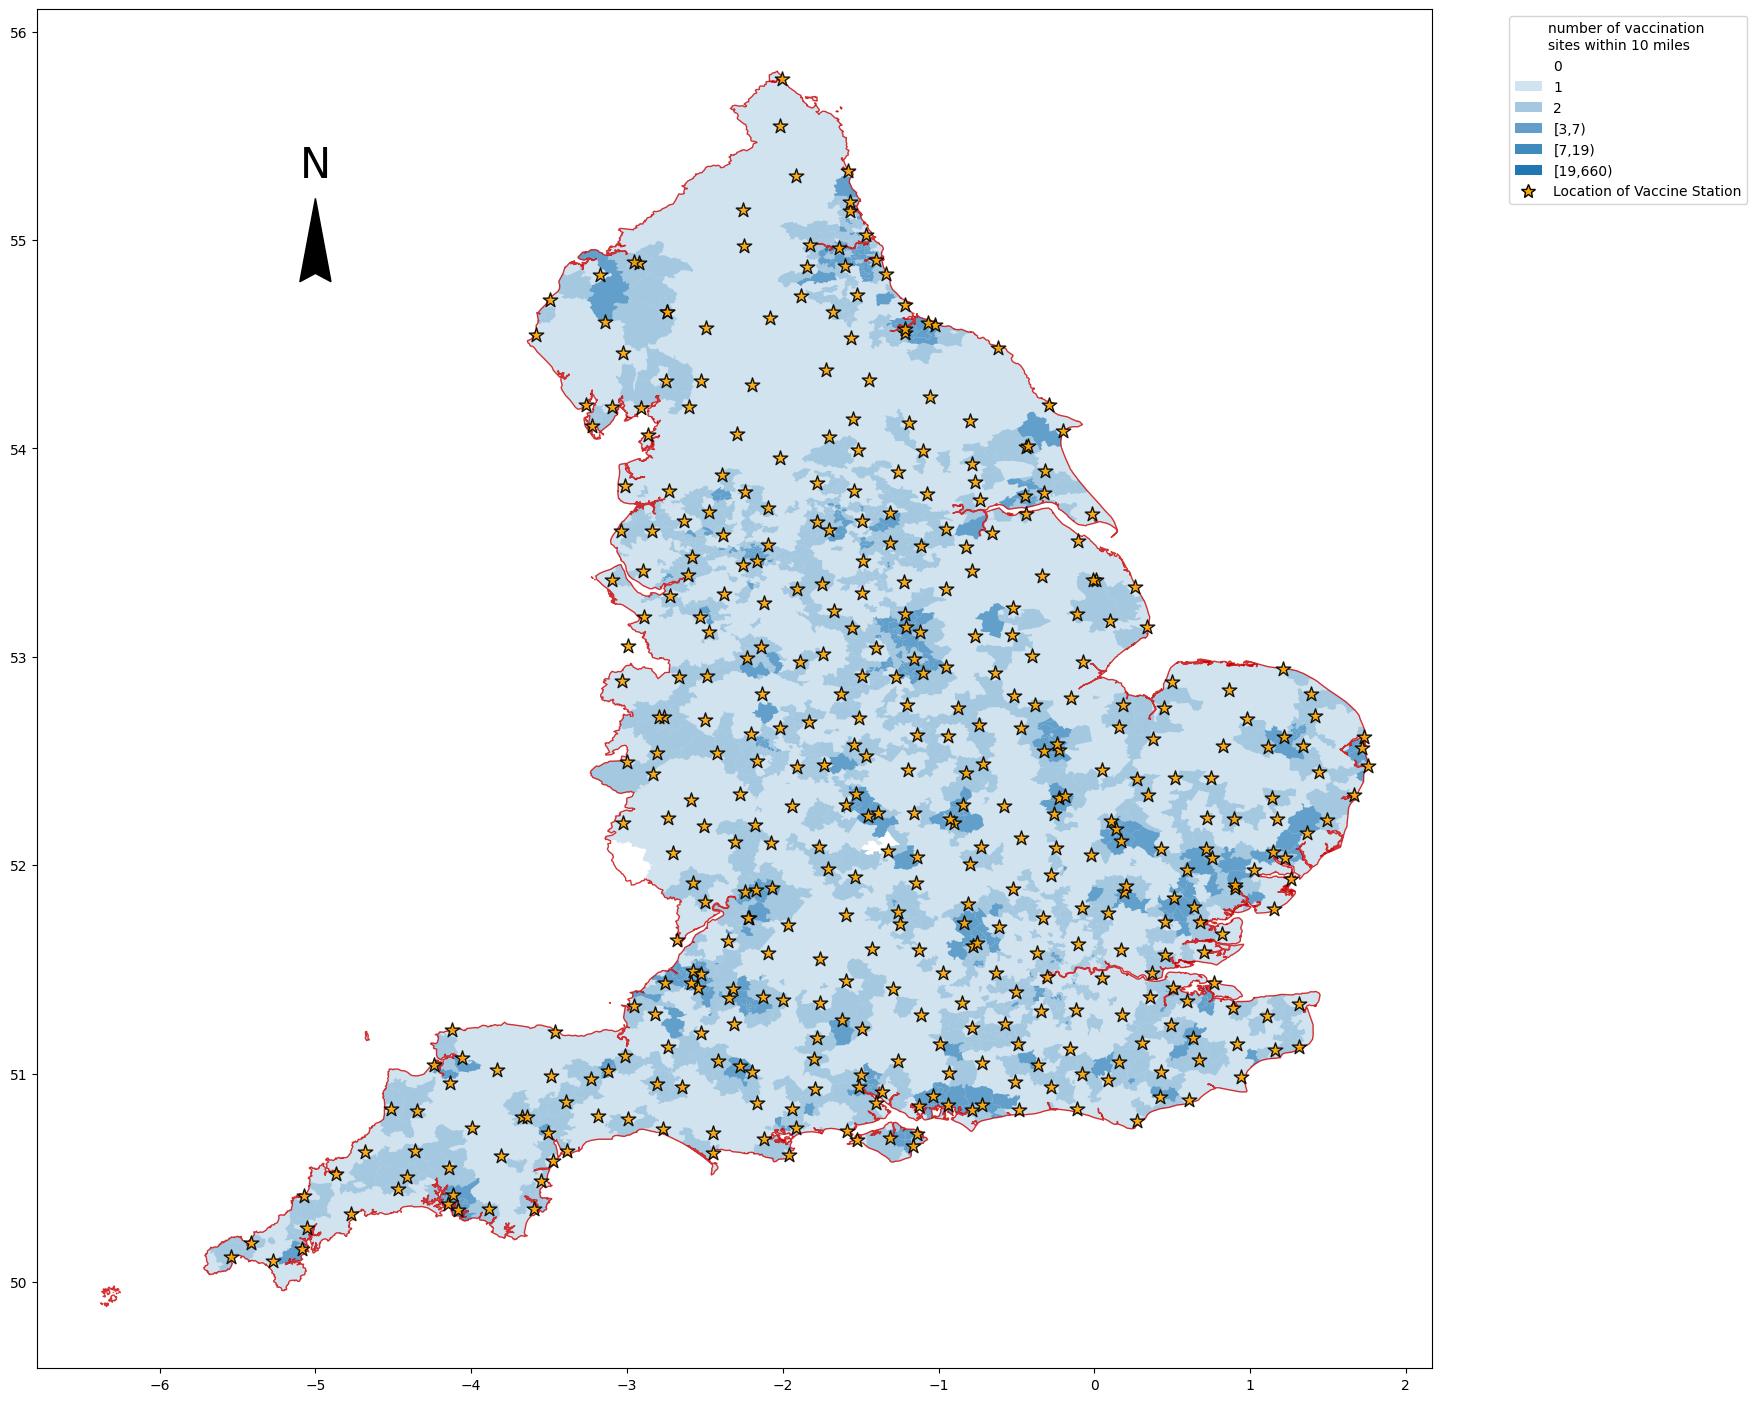

In [45]:
    fig, ax = plt.subplots(figsize=(18,18),dpi=100)
    legend_elements = []
    tract31.plot(figsize = (18,18),ax=ax,zorder=1,color='none')
    tract32.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract33.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract34.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.7)
    tract35.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.85)
    tract36.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract17.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract18.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8), label='MSOAs with Vaccination Service'))
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),facecolor='none',label='MSOAs Lack of Vaccination Service'))
    facility_points_gdf.plot(ax=ax,
                marker="*",
                markersize=120,
                alpha=0.9,
                zorder=4,
                edgecolor="k",
                facecolor='orange')
    facility_points_gdf2.plot(ax=ax,
                marker="*",
                markersize=120,
                alpha=0.9,
                zorder=4,
                edgecolor="k",
                facecolor='orange')
    ax.text(x=-5.1, y=55.3, s='N', fontsize=30)
    ax.arrow(-5, 55, 0, 0.2, length_includes_head=True,
       head_width=.2, head_length=.4, overhang=.1, facecolor='k')
    legend_elements.append(Patch(zorder=2,alpha=0,label='0'))
    legend_elements.append(Patch(zorder=2,alpha=0.2,label='1'))
    legend_elements.append(Patch(zorder=2,alpha=0.4,label='2'))
    legend_elements.append(Patch(zorder=2,alpha=0.7,label='[3,7)'))
    legend_elements.append(Patch(zorder=2,alpha=0.85,label='[7,19)'))
    legend_elements.append(Patch(zorder=2,label='[19,660)'))  
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='orange',
        marker='*',
        markersize=10,
        markeredgecolor="k",
        linewidth=0,
        label='Location of Vaccine Station'
        ))
    
    plt.gca().set_aspect('auto')
    # plt.title('title', fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left',title='number of vaccination \nsites within 10 miles',bbox_to_anchor=(1.05, 1))

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


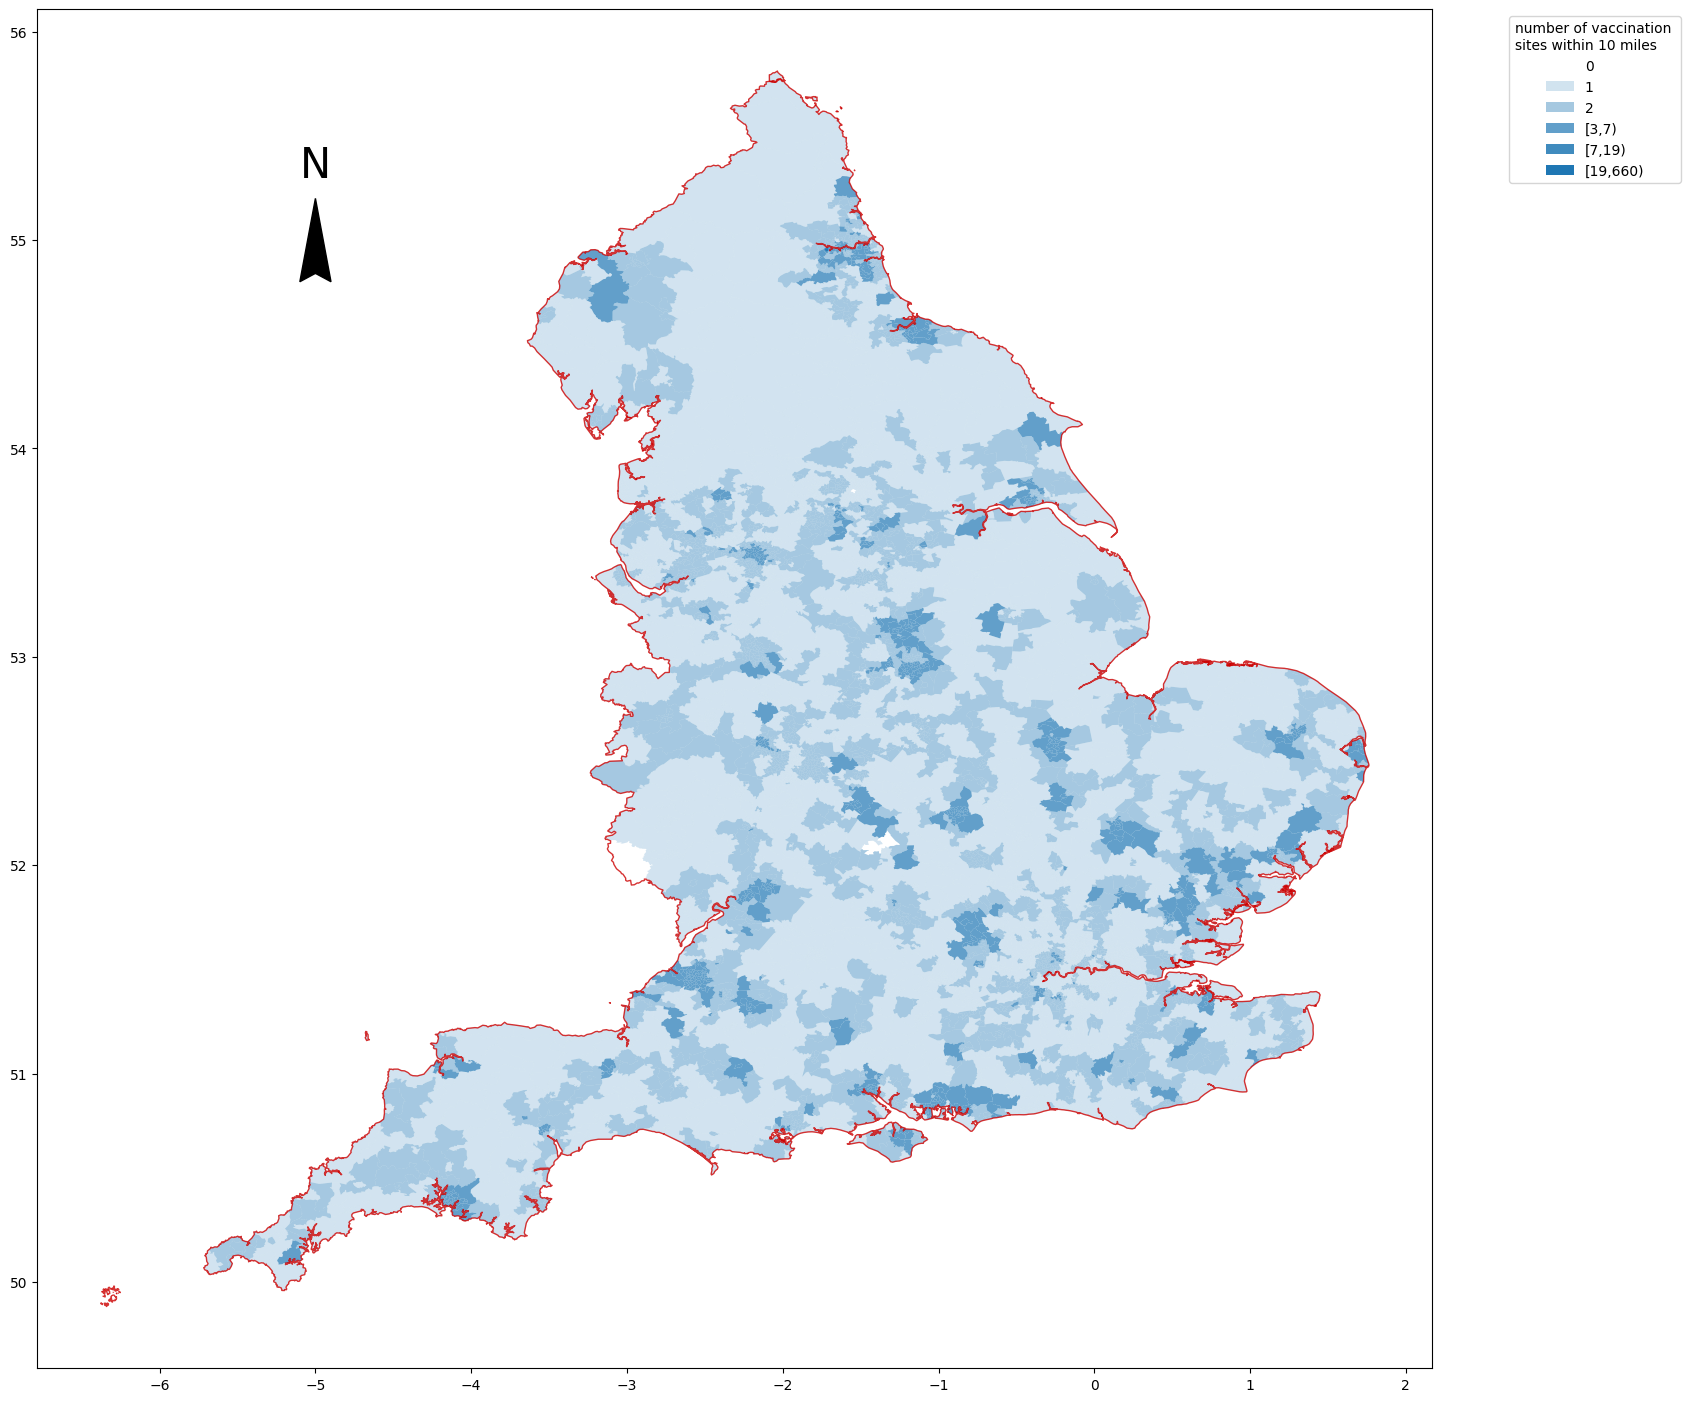

In [46]:
    fig, ax = plt.subplots(figsize=(18,18),dpi=100)
    legend_elements = []
    tract31.plot(figsize = (18,18),ax=ax,zorder=1,color='none')
    tract32.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract33.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract34.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.7)
    tract35.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.85)
    tract36.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract17.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract18.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8), label='MSOAs with Vaccination Service'))
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),facecolor='none',label='MSOAs Lack of Vaccination Service'))
 
    ax.text(x=-5.1, y=55.3, s='N', fontsize=30)
    ax.arrow(-5, 55, 0, 0.2, length_includes_head=True,
       head_width=.2, head_length=.4, overhang=.1, facecolor='k')
    legend_elements.append(Patch(zorder=2,alpha=0,label='0'))
    legend_elements.append(Patch(zorder=2,alpha=0.2,label='1'))
    legend_elements.append(Patch(zorder=2,alpha=0.4,label='2'))
    legend_elements.append(Patch(zorder=2,alpha=0.7,label='[3,7)'))
    legend_elements.append(Patch(zorder=2,alpha=0.85,label='[7,19)'))
    legend_elements.append(Patch(zorder=2,label='[19,660)'))  

    
    plt.gca().set_aspect('auto')
    # plt.title('title', fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left',title='number of vaccination \nsites within 10 miles',bbox_to_anchor=(1.05, 1))

#地图2

In [50]:
demand_points = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/MSOA380.csv?raw=ture')
demand_points

index  objectid   msoa11cd  point_lon  point_lat
0        1       311  E02002527  -0.895104  54.556813
1        2      1636  E02002692  -0.900405  53.979796
2        3      1634  E02002693  -0.271017  53.945190
3        4      1632  E02002694  -0.778200  53.931540
4        5      1631  E02002695  -0.168981  53.909875
..     ...       ...        ...        ...        ...
375    376      6413  E02006845  -2.906422  51.358374
376    377      6410  E02006846  -2.929576  51.347977
377    378      5000  E02006857   0.313122  50.786367
378    379      1484  E02006870  -0.786744  54.132341
379    380      5705  E02006880   1.167870  51.078965

[380 rows x 5 columns]

In [51]:
demand_points_gdf = geopandas.GeoDataFrame(
    demand_points,
    geometry=geopandas.points_from_xy(demand_points.point_lon, demand_points.point_lat),
).sort_values(by=['msoa11cd']).reset_index()

In [52]:
m=demand_points_gdf.drop(['geometry'],axis=1)

In [54]:
n = pandas.merge(left = tract,right = m, how='right', left_on='MSOA11CD', right_on='msoa11cd')

In [55]:
n

MSOA11CD                      MSOA11NM  ...  point_lon  point_lat
0    E02002527      Redcar and Cleveland 013  ...  -0.895104  54.556813
1    E02002692  East Riding of Yorkshire 009  ...  -0.900405  53.979796
2    E02002693  East Riding of Yorkshire 010  ...  -0.271017  53.945190
3    E02002694  East Riding of Yorkshire 011  ...  -0.778200  53.931540
4    E02002695  East Riding of Yorkshire 012  ...  -0.168981  53.909875
..         ...                           ...  ...        ...        ...
375  E02006845            North Somerset 026  ...  -2.906422  51.358374
376  E02006846            North Somerset 027  ...  -2.929576  51.347977
377  E02006857                Eastbourne 013  ...   0.313122  50.786367
378  E02006870                   Ryedale 008  ...  -0.786744  54.132341
379  E02006880                   Shepway 015  ...   1.167870  51.078965

[380 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  


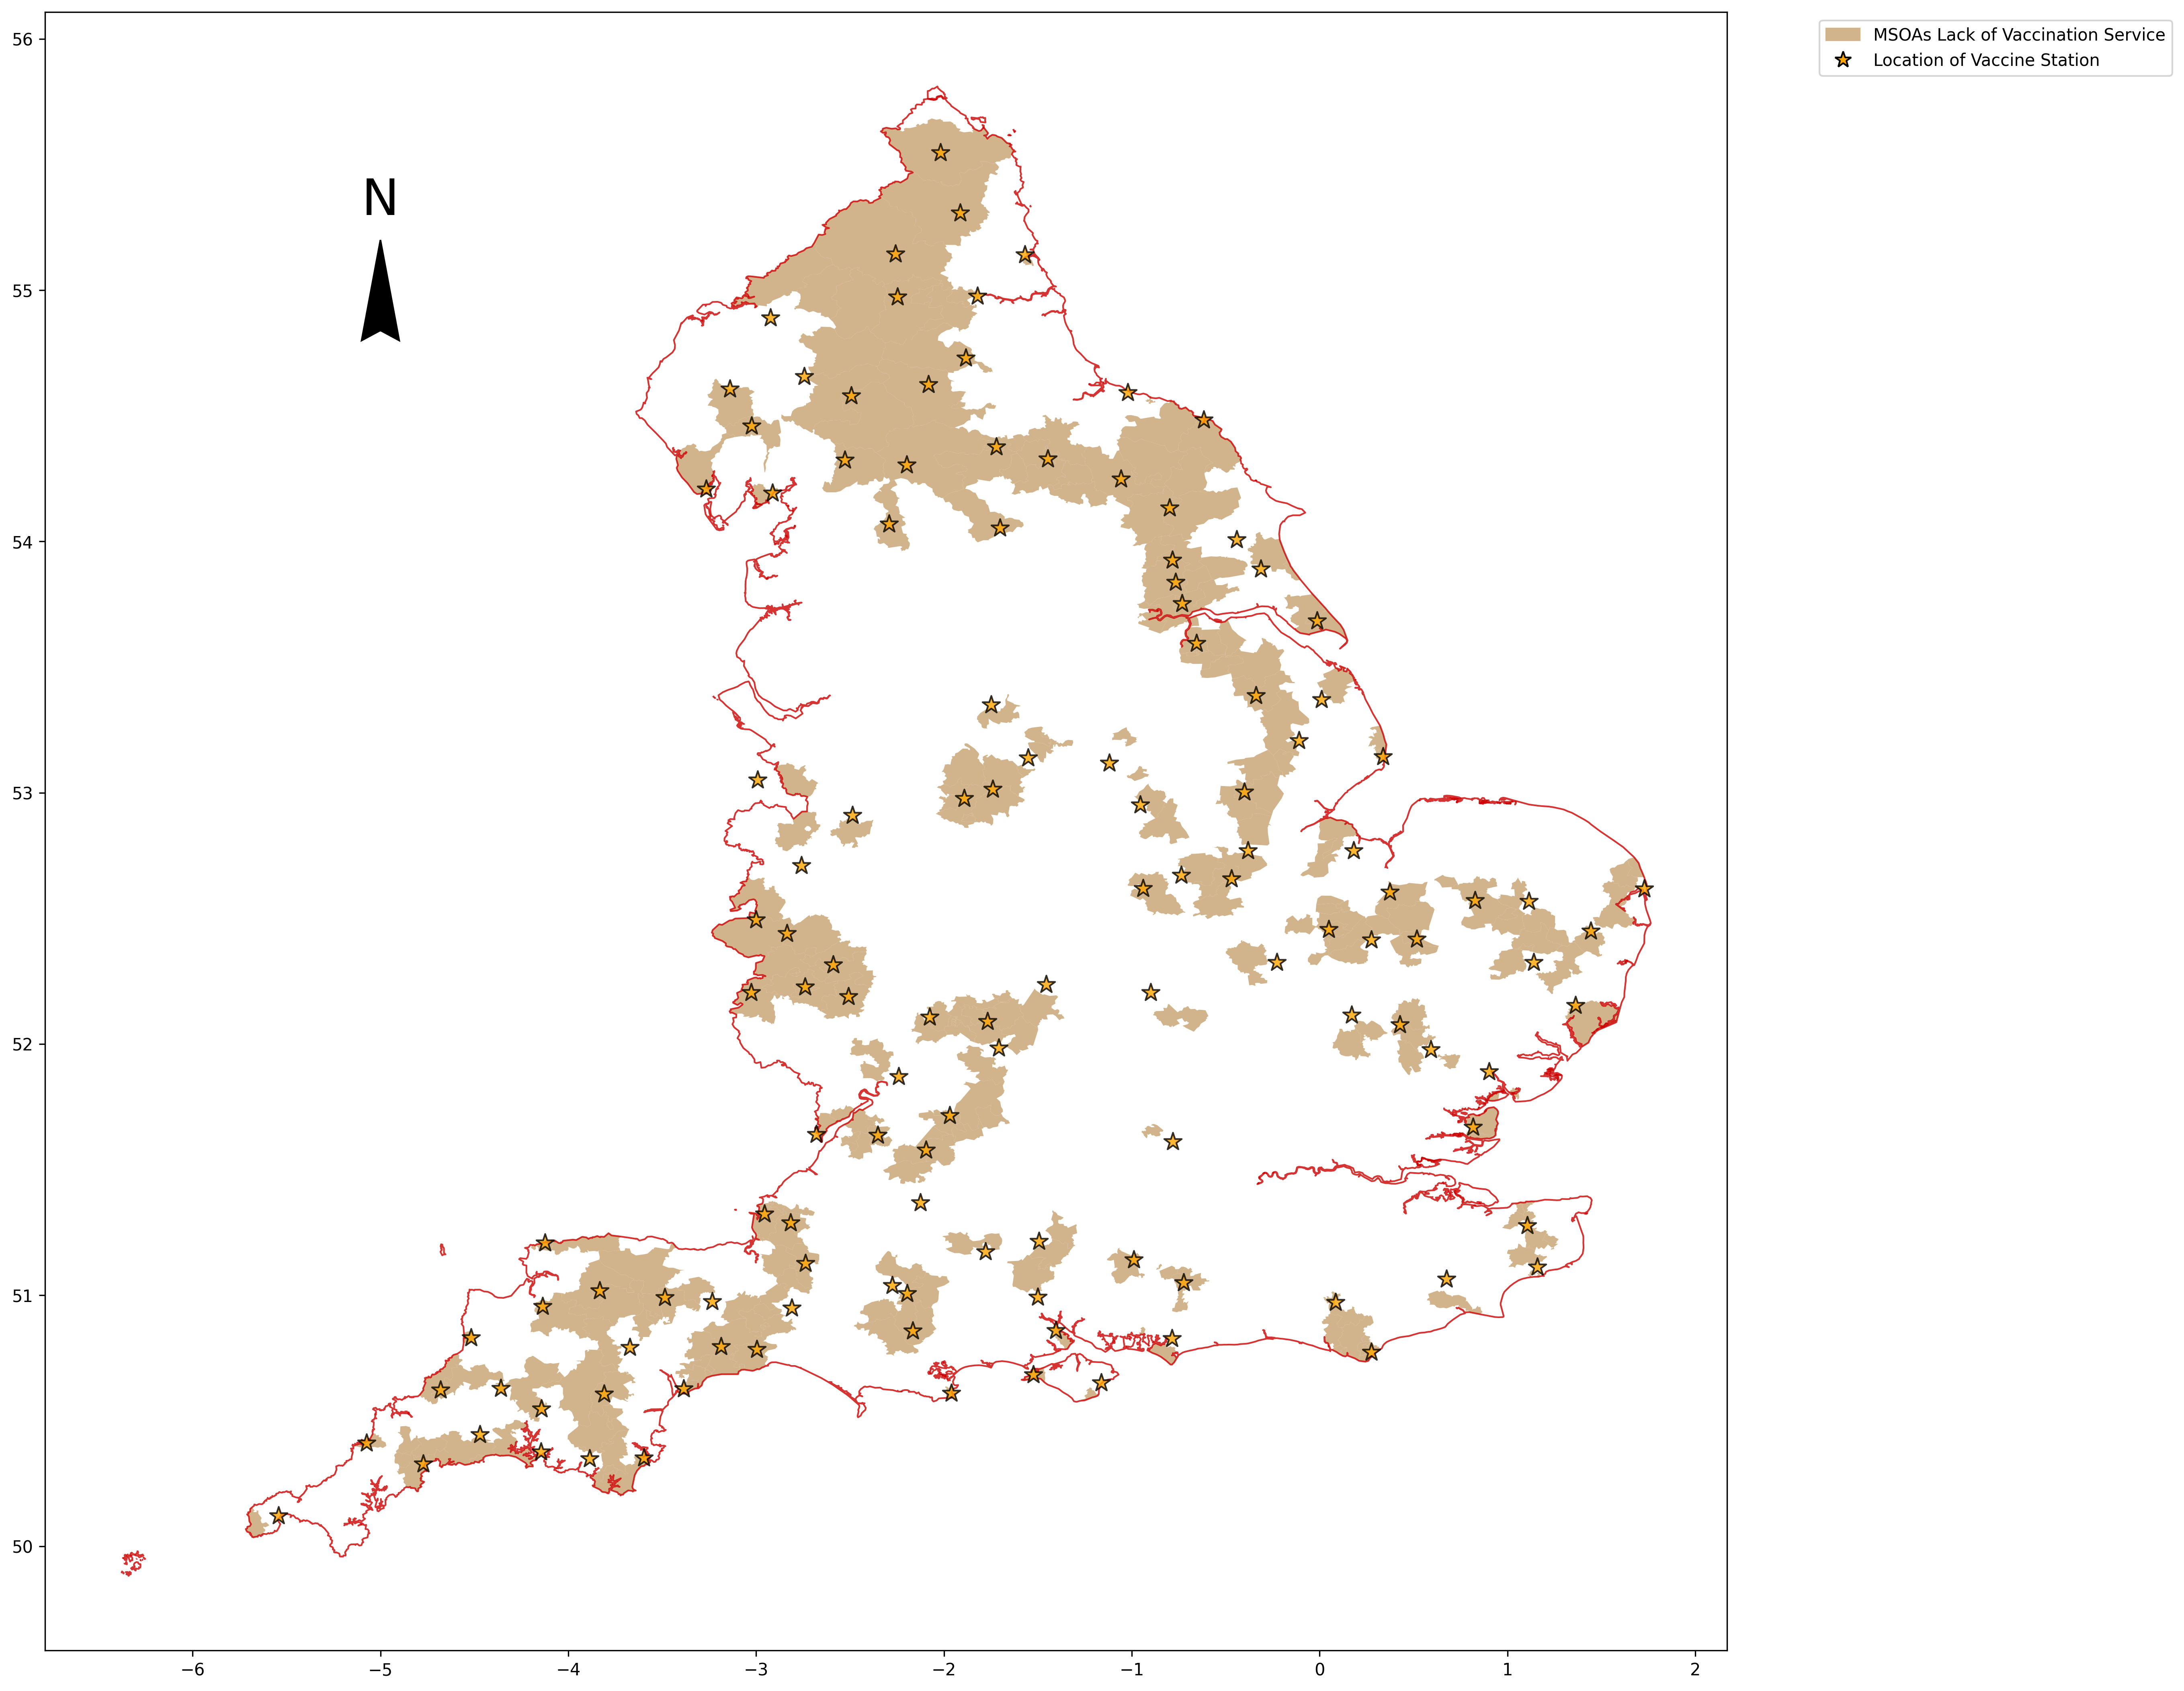

In [56]:
    fig, ax = plt.subplots(figsize=(18,18),dpi=300)
    legend_elements = []
    n.plot(figsize = (18,18),ax=ax,color='tan',zorder=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    facility_points_gdf.plot(ax=ax,marker='*',markersize=120,color='orange',edgecolor="k",alpha=0.8)
    legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),color='tan',label='MSOAs Lack of Vaccination Service'))
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),facecolor='none',label='MSOAs with Vaccination Service'))
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='orange',
        marker='*',
        markersize=10,
        markeredgecolor="k",
        linewidth=0,
        label='Location of Vaccine Station'
        ))
    ax.text(x=-5.1, y=55.3, s='N', fontsize=30)
    ax.arrow(-5, 55, 0, 0.2, length_includes_head=True,
       head_width=.2, head_length=.4, overhang=.1, facecolor='k')
    plt.gca().set_aspect('auto')
    # plt.title('Map of Underserved MSOAs', fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))